# Airline Passenger Satisfaction


In [4]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")
import os


# Introduction

 
I have predicted whether the passengers are satisfied with the trip.

* Let's start with content.

    1. [Load and Check Data](#1)
    2. [Variable Description](#2)
        * [Univariate Variable Analysis](#3)
            * [Categorical Variable](#4)
            * [Numerical Variable](#5)
    3. [Basic Data Analysis](#6)        
    4. [Outlier Detection](#7)
    5. [Missing Value](#8)
        * [Find Missing Value](#9)
        * [Fill Missing Value](#10)

    6. [Visualization](#11)
        * [Correlation Matrix](#12)
        * [Gender--> Satisfaction](#13)
        * [Age--> Satisfaction](#14)
        * [Customer Type--> Satisfaction](#15)
        * [Type of Travel--> Satisfaction](#16)
        * [Class--> Satisfaction](#17)
        * [Gender-->Age-->Satisfaction](#22)
        * [Personal Travel Analysis](#18)
            * [Service Scoring of Personal Travel Passenger](#19)
            * [Eating, Drinking, Cleaning and In-flight Entertainment Scoring of Personal Travel Passenger](#20)
            * [Aircraft Specifications Scoring](#21)
    7. [Feature Engineering](#23)
        * [Customer Type](#24)
        * [Type of Travel](#25)
        * [Class](#26)
        * [Gender](#27)
        * [Drop ID](#28)
    8. [Modeling](#29)
        * [Train - Test Split](#30)
        * [Simple Logistic Regression](#31)
        * [Hyperparameter Tuning - Grid Search - Cross Validation](#32)
        * [Ensemble Modeling](#33)
        * [Prediction and Submission](#34)
    9. [Conclusion](#35)


<a id = "1"></a><br>
# Load and Check Data


In [5]:
train_df=pd.read_csv("test.csv")
test_df=pd.read_csv("train.csv")

In [6]:
train_df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

* "Unnamed: 0" we will not use unnamed 0. so let's delete.

In [7]:
train_df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
test_df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [8]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [10]:
train_df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


<a id = "2"></a><br>
# Variable Description
1. id : Unique id number to each passenger.
2. Gender: Gender of the passengers (Female, Male)
3. Customer Type: The customer type (Loyal customer, disloyal customer)
4. Age: The actual age of the passengers
5. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
6. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
7. Flight distance: The flight distance of this journey
8. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
9. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
10. Ease of Online booking: Satisfaction level of online booking
11. Gate location: Satisfaction level of Gate location
12. Food and drink: Satisfaction level of Food and drink
13. Online boarding: Satisfaction level of online boarding
14. Seat comfort: Satisfaction level of Seat comfort
15. Inflight entertainment: Satisfaction level of inflight entertainment
16. On-board service: Satisfaction level of On-board service
17. Leg room service: Satisfaction level of Leg room service
18. Baggage handling: Satisfaction level of baggage handling
19. Check-in service: Satisfaction level of Check-in service
20. Inflight service: Satisfaction level of inflight service
21. Cleanliness: Satisfaction level of Cleanliness
22. Departure Delay in Minutes: Minutes delayed when departure
23. Arrival Delay in Minutes: Minutes delayed when Arrival
24. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

* int64(18): id, Age,Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness and Departure Delay in Minutes.
* object(5): Gender, Customer Type, Type of Travel, Class and satisfaction.
* float64(1): Arrival Delay in Minutes.

<a id = "3"></a><br>
# Univariate Variable Analysis


* Categorical Variables: Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,Gender, Customer Type, Type of Travel, Class and satisfaction.
* Numerical Variables: id, Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

<a id = "4"></a><br>
## Categorical Variables

In [14]:
def bar_plot(variable):
    
    var=train_df[variable]
    var_Value=var.value_counts()
    #print("var_Value",var_Value)
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

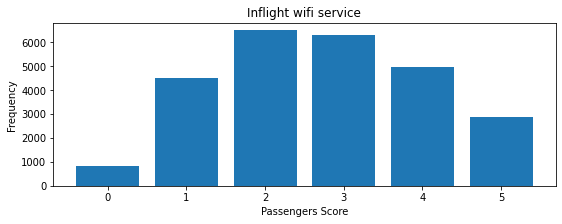

Inflight wifi service: 
 2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: Inflight wifi service, dtype: int64


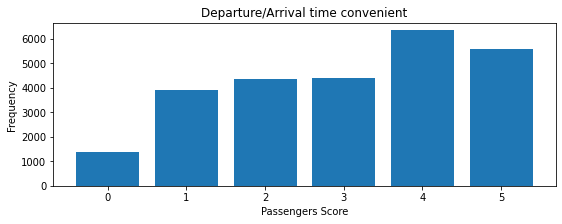

Departure/Arrival time convenient: 
 4    6334
5    5595
3    4412
2    4343
1    3911
0    1381
Name: Departure/Arrival time convenient, dtype: int64


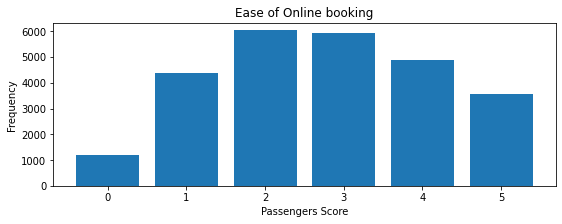

Ease of Online booking: 
 2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: Ease of Online booking, dtype: int64


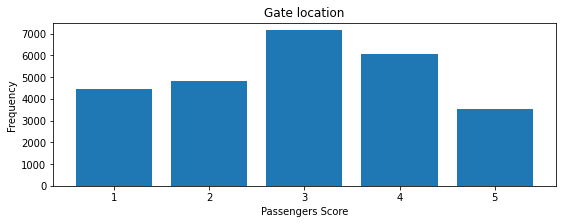

Gate location: 
 3    7140
4    6040
2    4837
1    4429
5    3530
Name: Gate location, dtype: int64


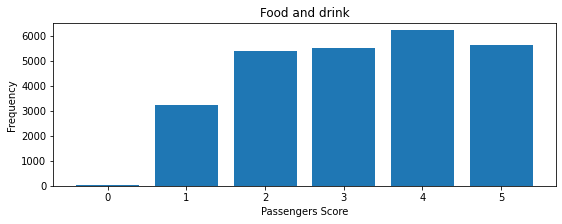

Food and drink: 
 4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: Food and drink, dtype: int64


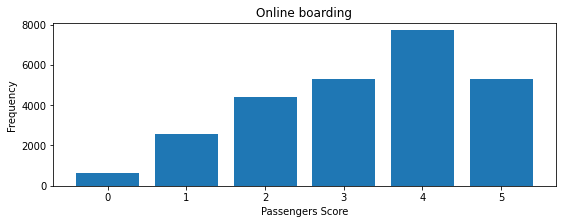

Online boarding: 
 4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64


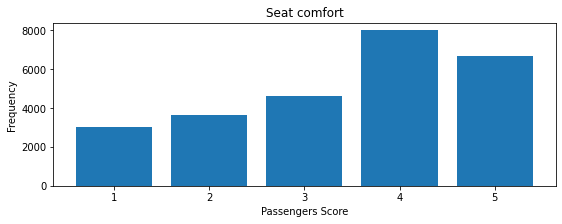

Seat comfort: 
 4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64


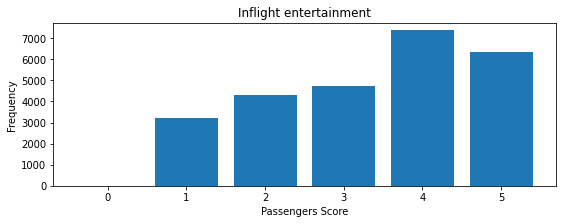

Inflight entertainment: 
 4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64


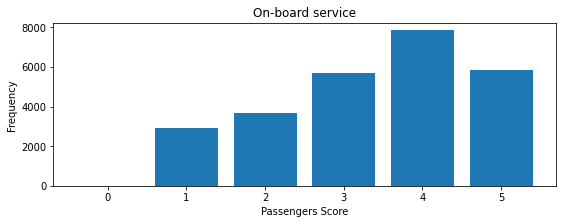

On-board service: 
 4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64


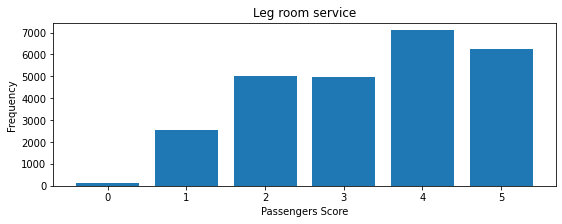

Leg room service: 
 4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: Leg room service, dtype: int64


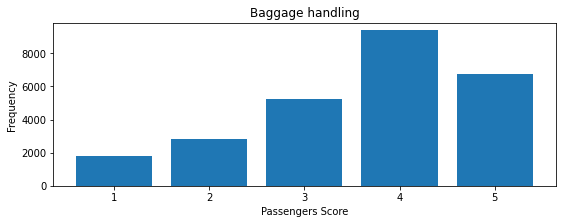

Baggage handling: 
 4    9378
5    6747
3    5219
2    2841
1    1791
Name: Baggage handling, dtype: int64


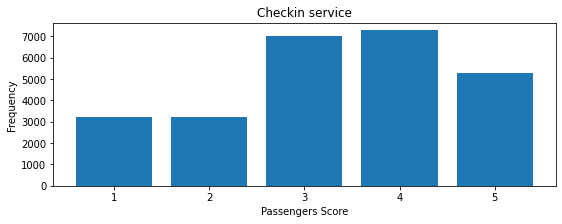

Checkin service: 
 4    7278
3    7007
5    5264
1    3218
2    3209
Name: Checkin service, dtype: int64


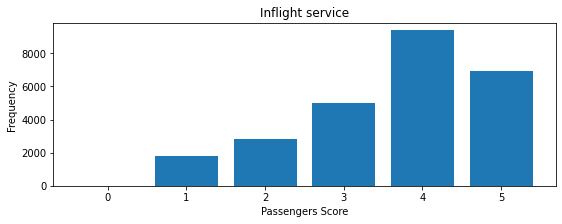

Inflight service: 
 4    9378
5    6950
3    5017
2    2851
1    1778
0       2
Name: Inflight service, dtype: int64


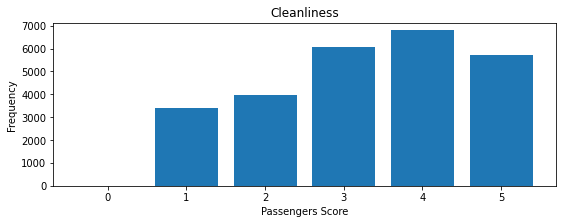

Cleanliness: 
 4    6790
3    6065
5    5727
2    3981
1    3411
0       2
Name: Cleanliness, dtype: int64


In [15]:
category1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in category1:
    bar_plot(c)

In [16]:
category2=["Gender", "Customer Type", "Type of Travel", "Class","satisfaction"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Female    13172
Male      12804
Name: Gender, dtype: int64 

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64 

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64 

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64 

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64 



<a id = "5"></a><br>
## Numerical Variable

In [21]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()


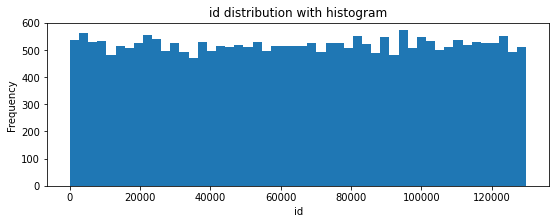

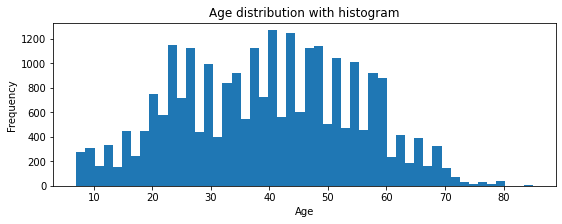

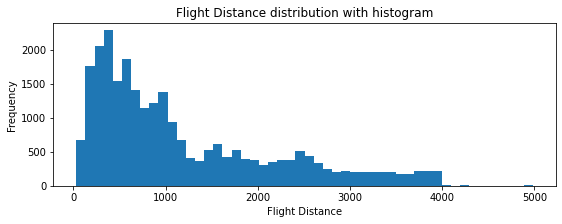

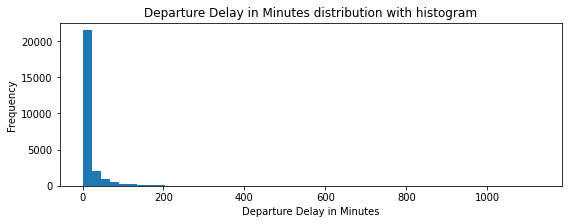

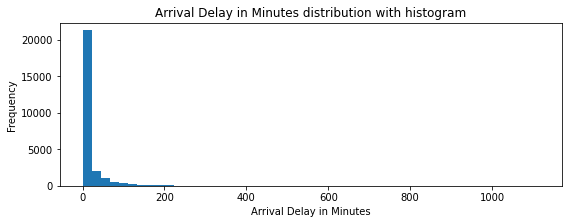

In [22]:
numericVar=["id","Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a><br>
# Basic Data Analysis
* First of all, I will turn it into numerical to use some object properties in the data. 
* The feature we will classify will be "satisfaction". We make it numeric too. satisfaction (0:neutral or dissatisfied, 1: satisfied)

In [37]:
train_df.columns=[each.replace(" ","_") for each in train_df.columns]

In [38]:
train_df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


In [25]:
train_df["satisfaction"]=[1 if each=="satisfied" else 0 for each in train_df.satisfaction]

In [26]:
train_df.head(10)

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1
5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1
6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,...,5,5,5,5,4,5,3,0,0.0,1
7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,...,4,4,4,4,5,4,3,77,65.0,1
8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,...,5,2,2,5,3,3,5,1,0.0,1
9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,...,4,4,4,4,5,4,4,28,14.0,1


* Now let's look at the effect of some features on satisfaction

* Gender --> satisfaction
* Age --> satisfaction
* Type_of_Travel --> satisfaction
* Class --> satisfaction
* Customer_Type --> satisfaction
* Cleanliness --> satisfaction
* Inflight_wifi_service --> satisfaction
* Inflight_entertainment --> satisfaction
* Food_and_drink --> satisfaction
* Seat_comfort --> satisfaction

In [27]:
# Gender vs satisfaction
train_df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)


,Gender,satisfaction
1,Male,0.442674
0,Female,0.435393


* Satisfaction rate of male passengers %44, satification rate of female passenger %43

In [28]:
# Age vs satisfaction
train_df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
44,51,0.630219
46,53,0.617336
34,41,0.614534
39,46,0.613879
49,56,0.606195
...,...,...
4,11,0.132075
62,69,0.117647
63,70,0.093960
1,8,0.076433


* The most satisfied age group 46-56.

In [29]:
# Type_of_Travel vs satisfaction
train_df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Type_of_Travel,satisfaction
0,Business travel,0.588203
1,Personal Travel,0.099899


* 58% of passengers traveling on business are satisfied, 0.09% of passengers traveling on personal are satisfied. It's interesting statistic.

In [30]:
# Class vs satisfaction
train_df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.695158
2,Eco Plus,0.247783
1,Eco,0.193878


* %69 of passenger class on business are satisfied, %24 of passenger class on eco plus are satisfied, %19 of passenger class on eco are satisfied. It is interesting that there is such a difference in satisfaction between eco and business.

In [31]:
# Customer_Type vs satisfaction
train_df[["Customer_Type","satisfaction"]].groupby(["Customer_Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Customer_Type,satisfaction
0,Loyal Customer,0.481419
1,disloyal Customer,0.251719


* Loyal Customer most satisfied than disloyal customer.

In [32]:
# Cleanliness vs satisfaction
train_df[["Cleanliness","satisfaction"]].groupby(["Cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Cleanliness,satisfaction
5,5,0.627030
4,4,0.535052
3,3,0.437923
2,2,0.211253
1,1,0.199941
0,0,0.000000


* Most of those who give 5 points to cleanliness are satisfied with the flight.

In [33]:
# Inflight_wifi_service vs satisfaction
train_df[["Inflight_wifi_service","satisfaction"]].groupby(["Inflight_wifi_service"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_wifi_service,satisfaction
0,0,0.997540
5,5,0.987877
4,4,0.607910
1,1,0.339127
3,3,0.256926
2,2,0.241448


* Most of those who give 0 to wifi service on the plane are satisfied with the flight. It seems that wifi service is not that important.

In [34]:
# Inflight_entertainment vs satisfaction
train_df[["Inflight_entertainment","satisfaction"]].groupby(["Inflight_entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_entertainment,satisfaction
5,5,0.659296
4,4,0.608578
3,3,0.285564
2,2,0.210113
1,1,0.150141
0,0,0.000000


* There is a standard distribution in flight entertainment.

In [35]:
# Food_and_drink vs satisfaction
train_df[["Food_and_drink","satisfaction"]].groupby(["Food_and_drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Food_and_drink,satisfaction
5,5,0.558292
4,4,0.529175
3,3,0.401711
2,2,0.393327
0,0,0.200000
1,1,0.197573


* 20% of the passengers who do not like the food are satisfied with the flight.Interesting statistic.

In [36]:
# Seat_comfort vs satisfaction
train_df[["Seat_comfort","satisfaction"]].groupby(["Seat_comfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Seat_comfort,satisfaction
4,5,0.655801
3,4,0.556876
1,2,0.233756
2,3,0.224309
0,1,0.223871


* There is no one that gives the seat comfort 0 points.

<a id = "7"></a><br>
# Outlier Detection
* Outlier detection is very important for the correct operation of the model when installing the model.

In [28]:
numerical_features = train_df.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()
numerical_features.columns

Index(['id', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'],
      dtype='object')

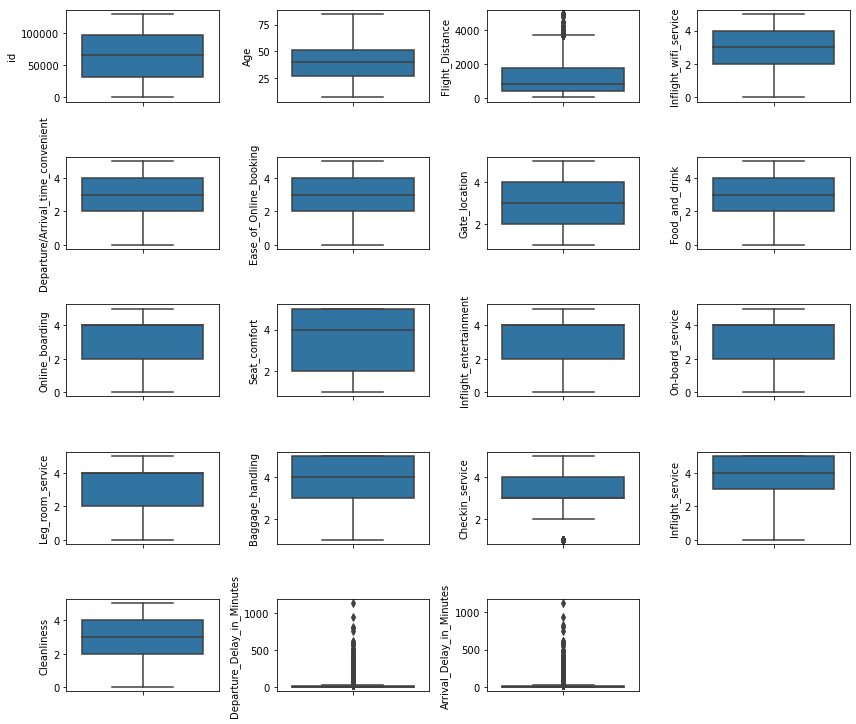

In [29]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [30]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indices 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [31]:
train_df.loc[detect_outliers(train_df,[ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes'])]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
145,7237,Female,Loyal Customer,53,Business travel,Business,3769,3,1,5,...,2,4,3,4,1,2,1,180,178.0,0
4498,27738,Female,Loyal Customer,27,Business travel,Business,3772,1,1,1,...,4,3,5,5,1,3,4,42,54.0,1
6736,16426,Male,Loyal Customer,51,Business travel,Business,3948,3,5,3,...,4,4,4,4,1,4,4,99,97.0,1
9261,19770,Male,Loyal Customer,31,Business travel,Business,3863,2,3,3,...,2,2,1,3,1,4,2,110,104.0,0
14509,113441,Female,Loyal Customer,46,Business travel,Business,3978,1,2,4,...,1,1,1,1,1,1,3,44,38.0,0
14865,16089,Female,Loyal Customer,49,Business travel,Business,3964,3,5,3,...,3,3,2,3,1,3,4,89,82.0,0


In [32]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,[ 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes',
       'Arrival_Delay_in_Minutes']),axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [33]:
test_df.columns=[each.replace(" ","_") for each in test_df.columns]
test_df["satisfaction"]=[1 if each=="satisfied" else 0 for each in test_df.satisfaction]

In [34]:
train_df.shape

(25970, 24)

In [35]:
train_df_len=len(train_df)
train_df= pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [36]:
train_df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


<a id = "9"></a><br>
## Find Missing Value

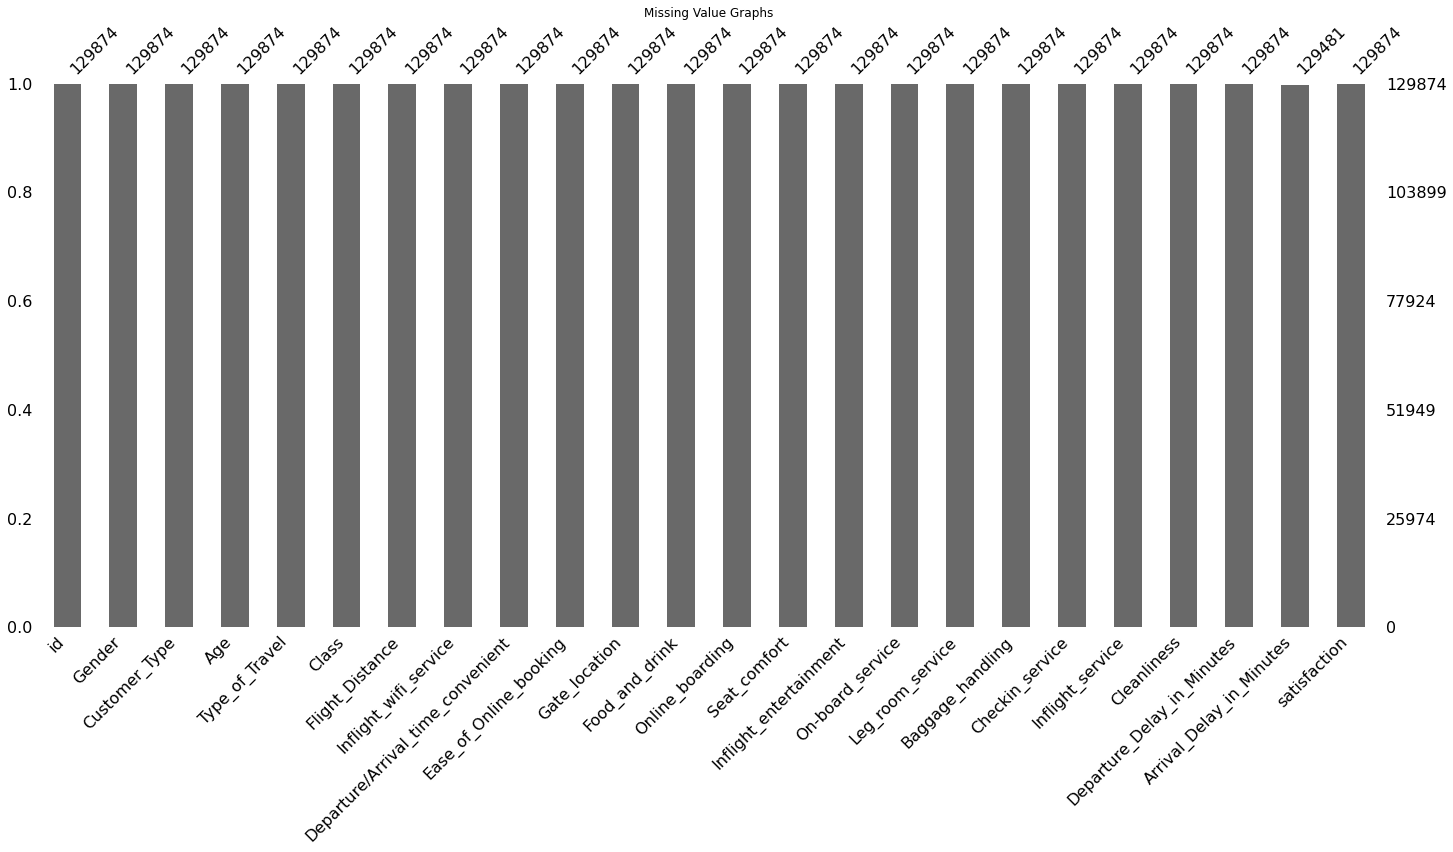

In [37]:
import missingno as msno
msno.bar(train_df)
plt.title("Missing Value Graphs")
plt.show()

* In the missing value chart, the only shortcoming is in Arrival_Delay_in_Minutes

In [38]:
train_df.columns[train_df.isnull().any()]

Index(['Arrival_Delay_in_Minutes'], dtype='object')

In [39]:
train_df.isnull().sum()

id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

<a id = "10"></a><br>
## Fill Missing Value
* Arrival_Delay_in_Minutes has 393 missing value
* Since I do not know the flight delay time, I will try a different method.
* I will fill the nan values with the average flight delay time. Because I don't want my model to be affected by this parameter.


In [40]:
np.mean(train_df["Arrival_Delay_in_Minutes"])

15.087557247781527

In [41]:
train_df[train_df["Arrival_Delay_in_Minutes"].isnull()]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
515,107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,...,2,4,2,5,4,5,2,9,NaN,0
655,108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,...,4,2,5,2,5,2,4,51,NaN,0
1070,16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,...,5,2,5,2,3,2,5,126,NaN,0
1223,30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,...,4,4,3,1,1,4,4,0,NaN,0
1588,41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,...,5,5,5,5,3,5,5,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128037,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,0
128354,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,0
128522,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,0
128930,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,1


In [42]:
train_df.shape

(129874, 24)

In [43]:
train_df["Arrival_Delay_in_Minutes"]=train_df["Arrival_Delay_in_Minutes"].fillna(np.mean(train_df["Arrival_Delay_in_Minutes"]))

In [44]:
train_df[train_df["Arrival_Delay_in_Minutes"].isnull()]

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction


<a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation Matrix

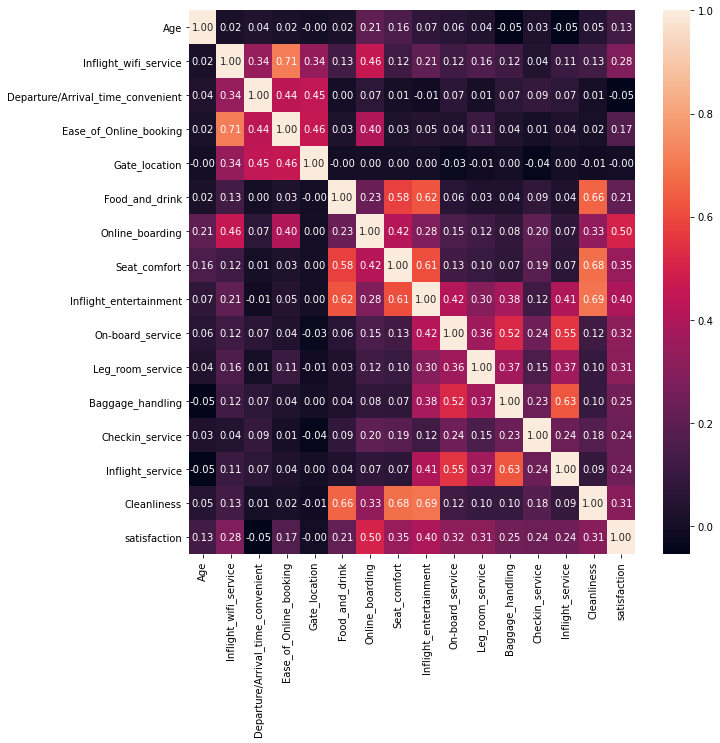

In [45]:
plt.figure(figsize=(10,10))
list1=["Age",'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness',"satisfaction"]
sns.heatmap(train_df[list1].corr(),annot=True,fmt=".2f")
plt.show()

<a id = "13"></a><br>
## Gender-->Satisfaction

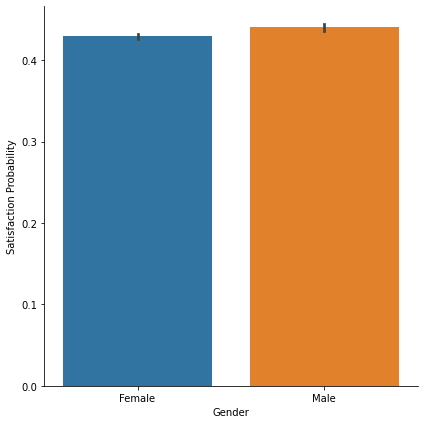

In [46]:
g=sns.catplot(x="Gender",y="satisfaction",data=train_df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Females and males are satisfaction probability almost equal. Male %44, Female %43 satisfaction.


<a id = "14"></a><br>
## Age-->Satisfaction

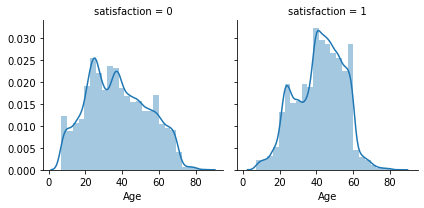

In [47]:
g= sns.FacetGrid(train_df,col="satisfaction")
g.map(sns.distplot,"Age",bins=25)
plt.show()
# 0=neutral or dissatisfied, 1=satisfied 

* 0-20 years old is  generally neutral or dissatisfied with the flight.
* 30-60 years old is generally satisfied with the flight.
* 65-80 years old passengers is neutral or dissatisfied.

<a id = "15"></a><br>
## Customer Type-->Satisfaction

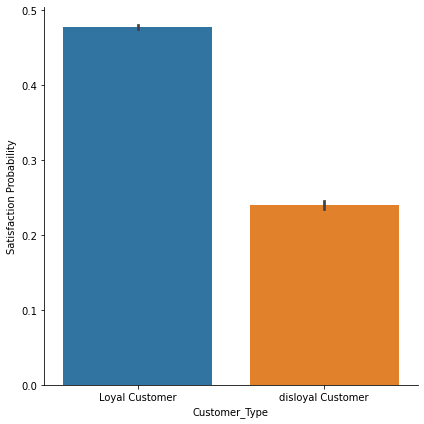

In [48]:
g=sns.factorplot(x="Customer_Type",y="satisfaction",data=train_df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Disloyal customer is generally neutral or dissatisfied with the flight.

<a id = "16"></a><br>
## Type of Travel-->Satisfaction

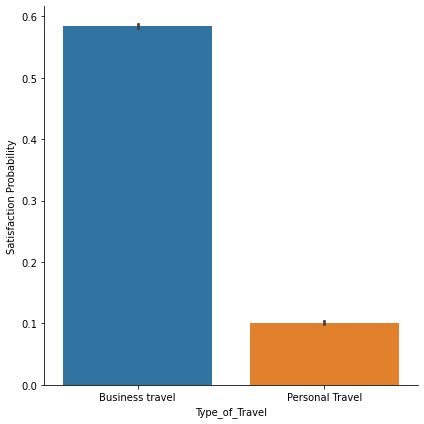

In [49]:
g=sns.factorplot(x="Type_of_Travel",y="satisfaction",data=train_df,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.
* Personal travel is %90 neutral or dissatisfied with the flight. This statistic is interesting.

<a id = "17"></a><br>
## Class-->Satisfaction

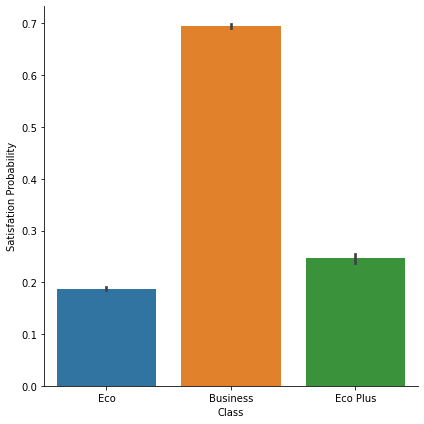

In [50]:
g=sns.factorplot(x="Class",y="satisfaction",data=train_df,kind="bar",size=6)
g.set_ylabels("Satisfation Probability")
plt.show()

* Business class is also happy here. But eco and eco plus  neutral or dissatisfied with the flight. 

<a id = "22"></a><br>
## Gender-->Age-->Satisfaction

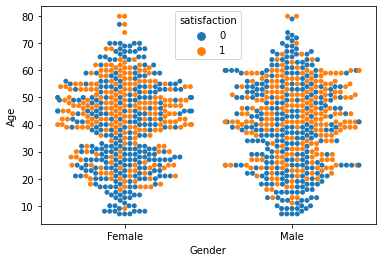

In [51]:
sns.swarmplot(x="Gender", y="Age",hue="satisfaction", data=train_df.head(1000))
plt.show()
# 0=neutral or dissatisfied, 1=satisfied  

<a id = "18"></a><br>

# Personal Travel Analysis
* Personal travel is generally neutral or dissatisfied with the flight.
* Let's examine why.

In [52]:
personal=train_df[train_df.Type_of_Travel=="Personal Travel"]
personal.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
15,22470,Male,Loyal Customer,50,Personal Travel,Eco,83,3,4,0,...,2,4,2,4,4,5,2,5,2.0,0
17,17836,Male,Loyal Customer,52,Personal Travel,Eco Plus,1075,5,4,5,...,4,3,5,5,4,5,4,0,0.0,1
18,76872,Female,Loyal Customer,43,Personal Travel,Eco,1927,3,4,3,...,5,5,3,5,4,5,3,0,0.0,0
21,75855,Male,Loyal Customer,43,Personal Travel,Eco,1437,3,4,3,...,2,4,2,4,4,5,2,0,0.0,0
22,106181,Male,Loyal Customer,55,Personal Travel,Eco,302,1,2,4,...,4,1,3,2,4,3,4,0,0.0,0


<a id = "19"></a><br>
## Service Scoring of Personal Travel Passenger

In [53]:
def service_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

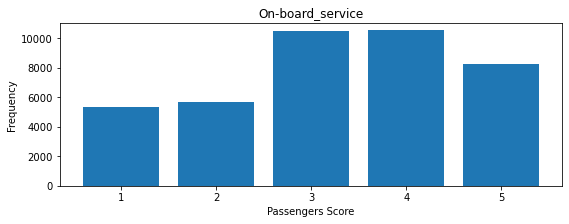

On-board_service: 
 4    10511
3    10462
5     8260
2     5649
1     5305
Name: On-board_service, dtype: int64


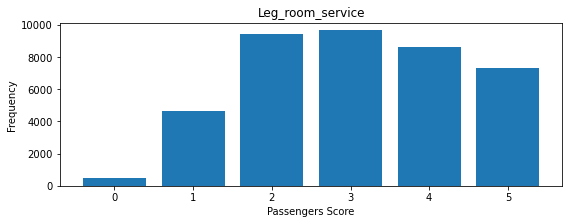

Leg_room_service: 
 3    9656
2    9436
4    8655
5    7309
1    4624
0     507
Name: Leg_room_service, dtype: int64


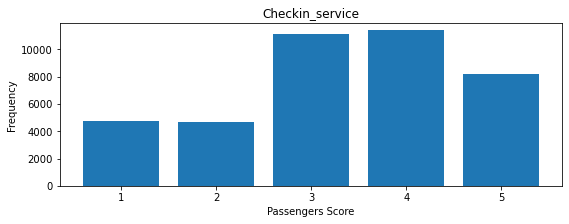

Checkin_service: 
 4    11395
3    11111
5     8199
1     4768
2     4714
Name: Checkin_service, dtype: int64


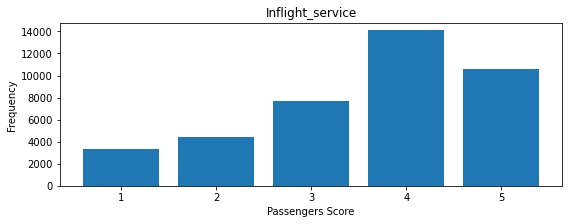

Inflight_service: 
 4    14082
5    10598
3     7726
2     4429
1     3352
Name: Inflight_service, dtype: int64


In [54]:
service=["On-board_service", "Leg_room_service", "Checkin_service","Inflight_service"]

for c in service:
    service_plot(c)

* There are 507 0 points in the leg room service.4624 has 1 point, 9436 has 2 points. Personal travel passengers are not satisfied with this service.
* There are lots of 1 and 2 points in on board service and checking service.

<a id = "20"></a><br>
## Eating, Drinking, Cleaning and In-flight Entertainment Scoring of Personal Travel Passenger

In [55]:
def eat_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

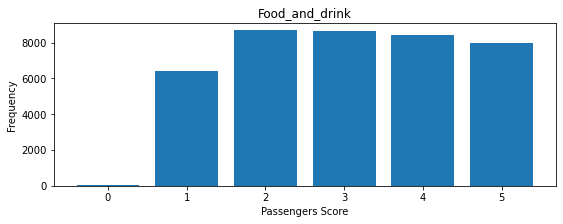

Food_and_drink: 
 2    8673
3    8668
4    8394
5    7992
1    6396
0      64
Name: Food_and_drink, dtype: int64


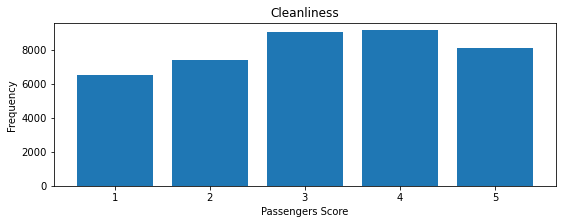

Cleanliness: 
 4    9127
3    9013
5    8095
2    7420
1    6532
Name: Cleanliness, dtype: int64


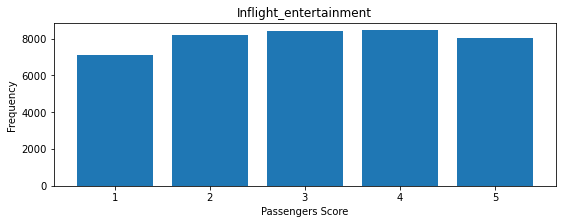

Inflight_entertainment: 
 4    8437
3    8395
2    8198
5    8054
1    7103
Name: Inflight_entertainment, dtype: int64


In [56]:
eat=["Food_and_drink", "Cleanliness", "Inflight_entertainment"]

for c in eat:
    eat_plot(c)

* There are many passengers who give 1 and 2 points in eating and drinking.There are also 64 passengers giving 0 points.
* There are many passengers who give 1 and 2 points in cleaning.
* There are many passengers who get 1 and 2 points in in-flight entertainment.
* There may be a problem with these services.

<a id = "21"></a><br>
## Aircraft Specifications Scoring

In [57]:
def flight_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

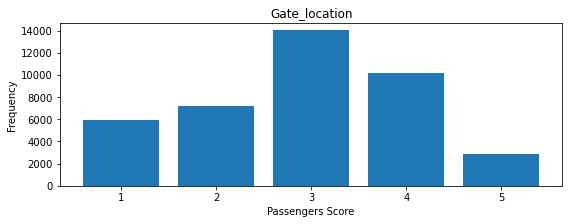

Gate_location: 
 3    14010
4    10131
2     7217
1     5948
5     2881
Name: Gate_location, dtype: int64


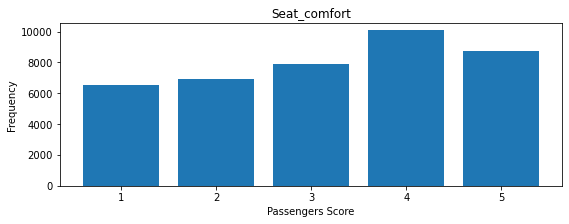

Seat_comfort: 
 4    10071
5     8771
3     7876
2     6946
1     6523
Name: Seat_comfort, dtype: int64


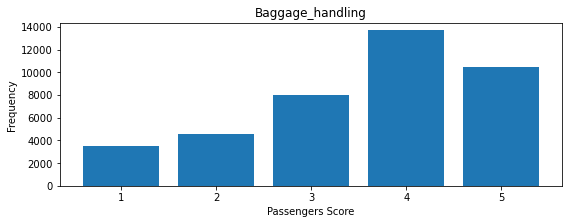

Baggage_handling: 
 4    13681
5    10464
3     7988
2     4563
1     3491
Name: Baggage_handling, dtype: int64


In [58]:
flight=["Gate_location", "Seat_comfort", "Baggage_handling"]

for c in flight:
    flight_plot(c)

* The gate position of the plane is not liked.
* Seat comfort is also not liked.

<a id = "23"></a><br>
# Feature Engineering 
* Our aim in this section is to bring out new features.

<a id = "24"></a><br>
## Customer Type

In [59]:
train_df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


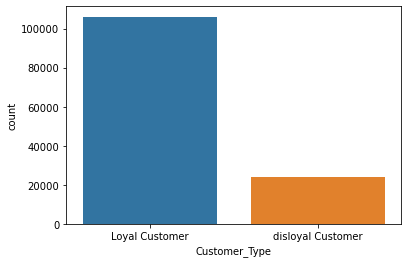

In [60]:
sns.countplot(x="Customer_Type",data=train_df)


In [61]:
train_df=pd.get_dummies(train_df,columns=["Customer_Type"])
train_df.head()

,id,Gender,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer
0,19556,Female,52,Business travel,Eco,160,5,4,3,4,...,5,5,2,5,5,50,44.0,1,1,0
1,90035,Female,36,Business travel,Business,2863,1,1,3,1,...,4,4,3,4,5,0,0.0,1,1,0
2,12360,Male,20,Business travel,Eco,192,2,0,2,4,...,1,3,2,2,2,0,0.0,0,0,1
3,77959,Male,44,Business travel,Business,3377,0,0,0,2,...,1,1,3,1,4,0,6.0,1,1,0
4,36875,Female,49,Business travel,Eco,1182,2,3,4,3,...,2,2,4,2,4,0,20.0,1,1,0


<a id = "25"></a><br>
## Type of Travel

In [62]:
train_df.Type_of_Travel.head()

0    Business travel
1    Business travel
2    Business travel
3    Business travel
4    Business travel
Name: Type_of_Travel, dtype: object

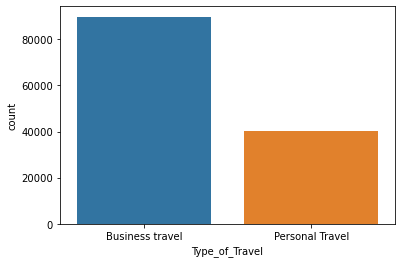

In [63]:
sns.countplot(x="Type_of_Travel",data=train_df)

In [64]:
train_df=pd.get_dummies(train_df,columns=["Type_of_Travel"])
train_df.head()

,id,Gender,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel
0,19556,Female,52,Eco,160,5,4,3,4,3,...,2,5,5,50,44.0,1,1,0,1,0
1,90035,Female,36,Business,2863,1,1,3,1,5,...,3,4,5,0,0.0,1,1,0,1,0
2,12360,Male,20,Eco,192,2,0,2,4,2,...,2,2,2,0,0.0,0,0,1,1,0
3,77959,Male,44,Business,3377,0,0,0,2,3,...,3,1,4,0,6.0,1,1,0,1,0
4,36875,Female,49,Eco,1182,2,3,4,3,4,...,4,2,4,0,20.0,1,1,0,1,0


<a id = "26"></a><br>
## Class

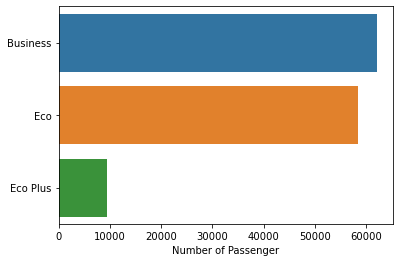

In [65]:
sns.barplot(x=train_df.Class.value_counts().values,y=train_df.Class.value_counts().index)
plt.xlabel("Number of Passenger")
plt.show()

In [66]:
train_df=pd.get_dummies(train_df,columns=["Class"])
train_df.head()

,id,Gender,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,...,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,19556,Female,52,160,5,4,3,4,3,4,...,50,44.0,1,1,0,1,0,0,1,0
1,90035,Female,36,2863,1,1,3,1,5,4,...,0,0.0,1,1,0,1,0,1,0,0
2,12360,Male,20,192,2,0,2,4,2,2,...,0,0.0,0,0,1,1,0,0,1,0
3,77959,Male,44,3377,0,0,0,2,3,4,...,0,6.0,1,1,0,1,0,1,0,0
4,36875,Female,49,1182,2,3,4,3,4,1,...,0,20.0,1,1,0,1,0,0,1,0


<a id = "27"></a><br>
## Gender

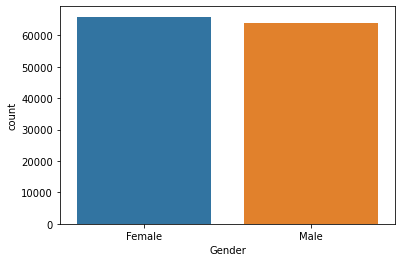

In [67]:
sns.countplot(x="Gender",data=train_df)

In [68]:
train_df=pd.get_dummies(train_df,columns=["Gender"])
train_df.head()

,id,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
0,19556,52,160,5,4,3,4,3,4,3,...,1,1,0,1,0,0,1,0,1,0
1,90035,36,2863,1,1,3,1,5,4,5,...,1,1,0,1,0,1,0,0,1,0
2,12360,20,192,2,0,2,4,2,2,2,...,0,0,1,1,0,0,1,0,0,1
3,77959,44,3377,0,0,0,2,3,4,4,...,1,1,0,1,0,1,0,0,0,1
4,36875,49,1182,2,3,4,3,4,1,2,...,1,1,0,1,0,0,1,0,1,0


<a id = "28"></a><br>
## Drop ID

In [69]:
train_df.drop(labels=["id"],axis=1,inplace=True)

In [70]:
train_df.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,satisfaction,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
0,52,160,5,4,3,4,3,4,3,5,...,1,1,0,1,0,0,1,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,1,1,0,1,0,1,0,0,1,0
2,20,192,2,0,2,4,2,2,2,2,...,0,0,1,1,0,0,1,0,0,1
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,0,1,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,1,1,0,1,0,0,1,0,1,0


<a id = "29"></a><br>
# Modeling
* Algorithms that we will use when creating our model;
* Logistic Regression
* Random Forest Classifer
* Decision Tree Classifer
* KNeighbors Classifer

## Import Librarires

In [71]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<a id = "30"></a><br>
## Train - Test Split

In [72]:
train_df_len

25970

In [73]:
test=train_df[train_df_len:]
test.drop(labels=["satisfaction"],axis=1,inplace=True)

In [74]:
test.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Arrival_Delay_in_Minutes,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
25970,13,460,3,4,3,1,5,3,5,5,...,18.0,1,0,0,1,0,0,1,0,1
25971,25,235,3,2,3,3,1,3,1,1,...,6.0,0,1,1,0,1,0,0,0,1
25972,26,1142,2,2,2,2,5,5,5,5,...,0.0,1,0,1,0,1,0,0,1,0
25973,25,562,2,5,5,5,2,2,2,2,...,9.0,1,0,1,0,1,0,0,1,0
25974,61,214,3,3,3,3,4,5,5,3,...,0.0,1,0,1,0,1,0,0,0,1


In [75]:
train=train_df[:train_df_len]
X_train=train.drop(labels="satisfaction",axis=1)
y_train=train["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 17399
X_test 8571
y_train 17399
y_test 8571
test 103904


<a id = "31"></a><br>
## Simple Logistic Regression

In [76]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 81.94
Test Accuracy: % 81.39


* Our logistic regression model gives 81.94% correct results.
* 19% error margin is not good for this data.

## Confusion Matrix (Logistic Regression)

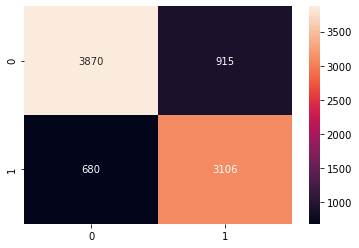

In [77]:
y_pred=logreg.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

* In the confusion matrix we can see where our mistakes are.
* 0:satisfied, 1: neutral or dissatisfied.

<a id = "32"></a><br>
## Hyperparameter Tuning - Grid Search - Cross Validation
We will compare 4 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.
* Decision Tree
* Random Forest
* KNN
* Logistic Regression

In [78]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]


In [79]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.9426983403065574
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 18.8min finished


0.9574115458084643
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 133 out of 140 | elapsed:    8.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.3s finished


0.8198176386217473
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.5s


0.784126066638906


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   38.5s finished


Text(0.5, 1.0, 'Cross Validation Scores')

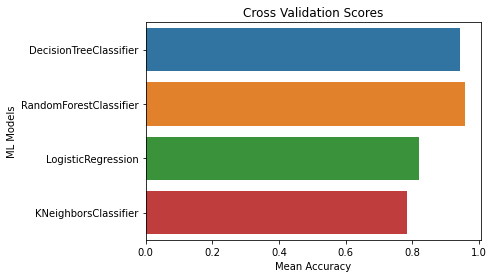

In [80]:
cv_results = pd.DataFrame({"Cross Validation Means":[0.9426983403065574,0.9574115458084643,0.8198176386217473,0.784126066638906], "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

* DecisonTreeClassifier accuracy score: 94.2%
* RandomForestClassifier accuracy score: 95.7%
* LogisticRegression : 81.9%
* KNeighborsClassifier: 78.4%

<a id = "33"></a><br>
## Ensemble Modeling
* We will combine 2 algorithms with the best value. These will be random forest classifer and decision tree classifer.

In [81]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[1])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.954614397386536


* Our model estimates 95.4% correctly. Our model works well.

<a id = "34"></a><br>
## Prediction and Submission

In [82]:
test_satisfaction = pd.Series(votingC.predict(test), name = "satisfaction").astype(int)
results = pd.concat([test_df.id, test_satisfaction],axis = 1)
results.to_csv("satisfaction.csv", index = False)
results.head()

,id,satisfaction
0,70172,0
1,5047,0
2,110028,1
3,24026,0
4,119299,1


<a id = "35"></a><br>
# Conclusion
* In this project, I tried to find out if people are satisfied with the airplane journey.
